# Homework 4  
Wajih Arfaoui

## Exercise 3

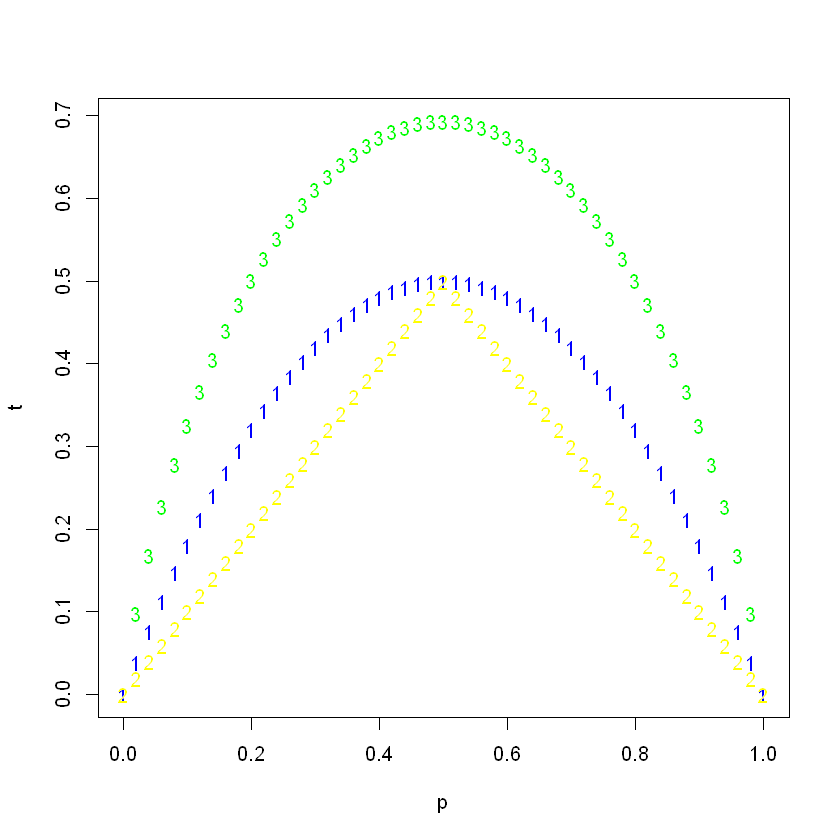

In [136]:
p = seq(0,1,0.02)
gini = p*(1-p)*2
err = 1 - pmax(p,1-p)
entropy = -((p*log(p)) + (1-p)*log(1-p))
t = cbind(gini,err,entropy)
matplot(p,t, col=c("blue","yellow","green"))

## Exercise 5

In [137]:
p = c(0.1,0.15,0.2,0.2,0.55,0.6,0.65,0.7,0.75)

sum(p>=0.5)>sum(p<0.5)

[1] TRUE

It is classified as **red** under the majority approach

In [138]:
mean(p)

[1] 0.4333333

It is classified as **green** under the average approach

## Exercise 8

In [139]:
library(ISLR)
attach(Carseats)

The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 9):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




In [140]:
set.seed(42)
split = sample(dim(Carseats)[1],dim(Carseats)[1]/2)
car.train = Carseats[split,]
car.test = Carseats[-split,]

In [141]:
library(tree)
tree.model = tree(Sales~.,car.train)

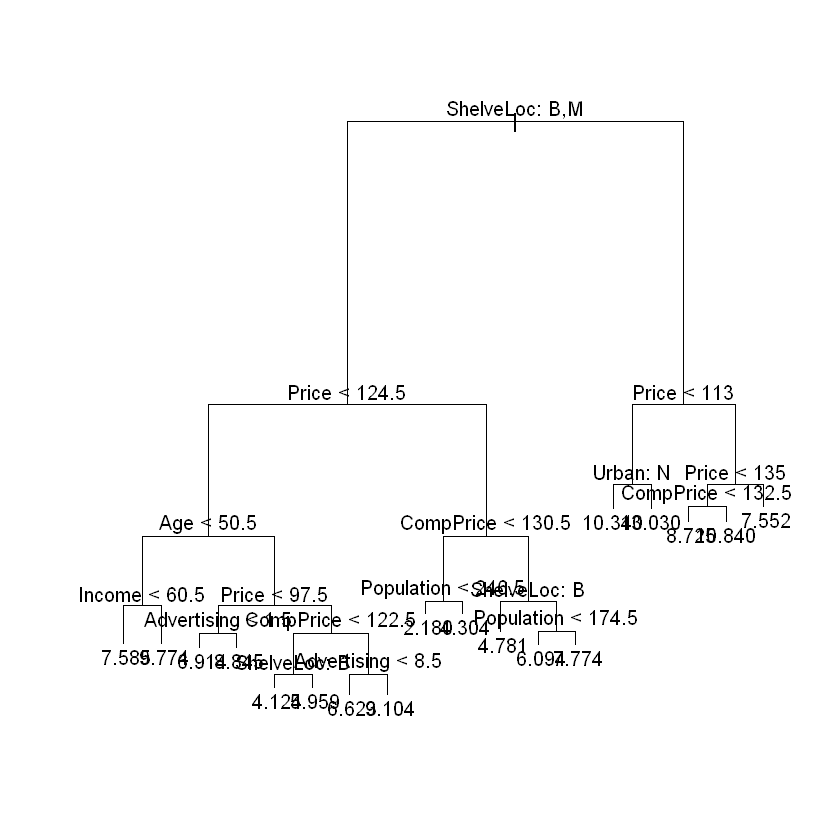

In [142]:
plot(tree.model)
text(tree.model,pretty=1)

In [143]:
tree.pred = predict(tree.model, car.test)
mean((car.test$Sales - tree.pred)^2)

[1] 5.686401

In [144]:
cv.carseats = cv.tree(tree.model, FUN = prune.tree)

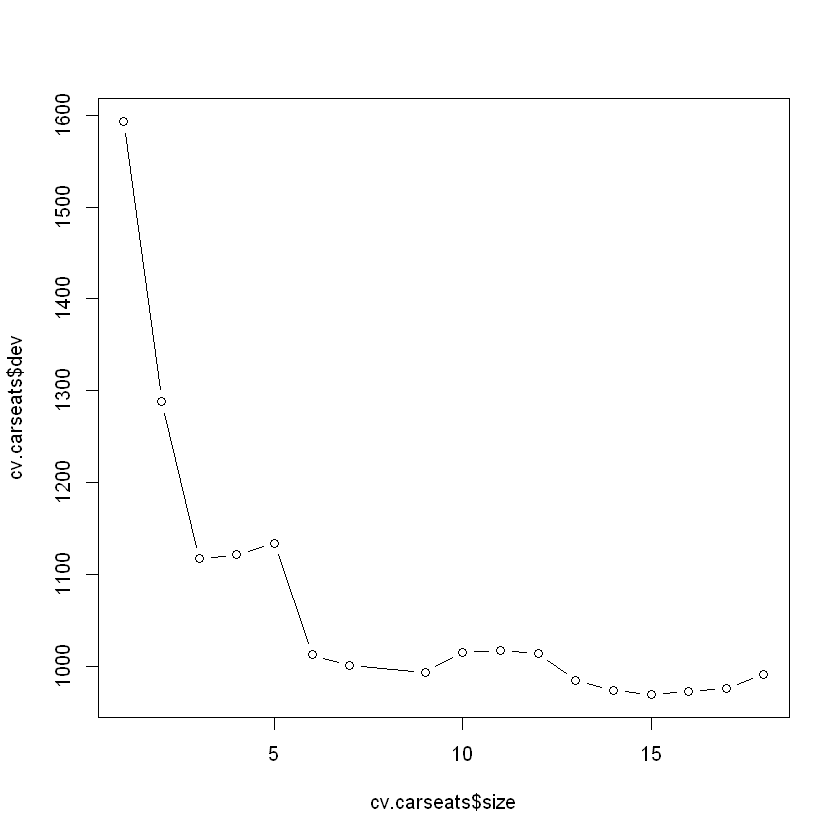

In [145]:
plot(cv.carseats$size, cv.carseats$dev, type = "b")

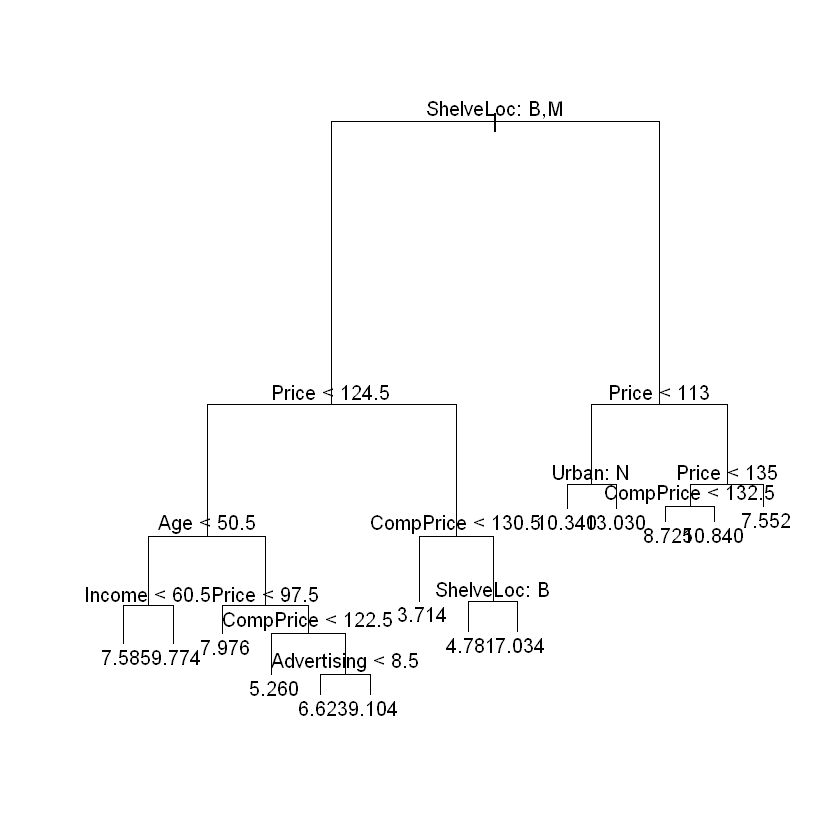

In [146]:
prune.car = prune.tree(tree.model, best = 14)
plot(prune.car)
text(prune.car, pretty = 1)

In [147]:
pred.pruned = predict(prune.car, car.test)
mean((car.test$Sales - pred.pruned)^2)

[1] 5.374621

In [148]:
library(randomForest)
bag.car = randomForest(Sales ~ ., data = car.train, mtry = 10, ntree = 500,importance = T)

In [149]:
bag.pred = predict(bag.car, car.test)
mean((car.test$Sales - bag.pred)^2)

[1] 2.360426

In [150]:
importance(bag.car)

,%IncMSE,IncNodePurity
CompPrice,30.4417501,197.998343
Income,9.2101020,104.302860
Advertising,12.7498522,104.098442
Population,2.4997582,62.703767
Price,54.8337819,432.196870
ShelveLoc,56.8325702,429.294512
Age,10.4795981,133.921947
Education,-0.5607019,42.616731
Urban,1.8401309,10.026923
US,0.8045295,5.682508


In [151]:
rf.car = randomForest(Sales ~ ., data = car.train, mtry = 5, importance = T)

In [152]:
rf.pred = predict(rf.car, car.test)
mean((car.test$Sales - rf.pred)^2)

[1] 2.497308

In [153]:
importance(rf.car)

,%IncMSE,IncNodePurity
CompPrice,21.500640,170.04773
Income,6.102822,121.36986
Advertising,11.490551,116.74809
Population,2.362485,87.46212
Price,40.299963,393.10510
ShelveLoc,43.384264,378.63877
Age,8.196422,156.02420
Education,1.364735,62.52696
Urban,1.696586,13.05997
US,1.774820,11.90007


## Exercise 9

In [154]:
library(ISLR)
attach(OJ)

The following objects are masked from OJ (pos = 5):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase




In [155]:
set.seed(1)
split= sample(dim(OJ)[1],800)
train = OJ[split,]
test = OJ[-split,]

In [156]:
library(tree)
tree.model = tree(Purchase ~ ., train)
summary(tree.model)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [157]:
tree.model

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196197 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196197 17   12.32 M

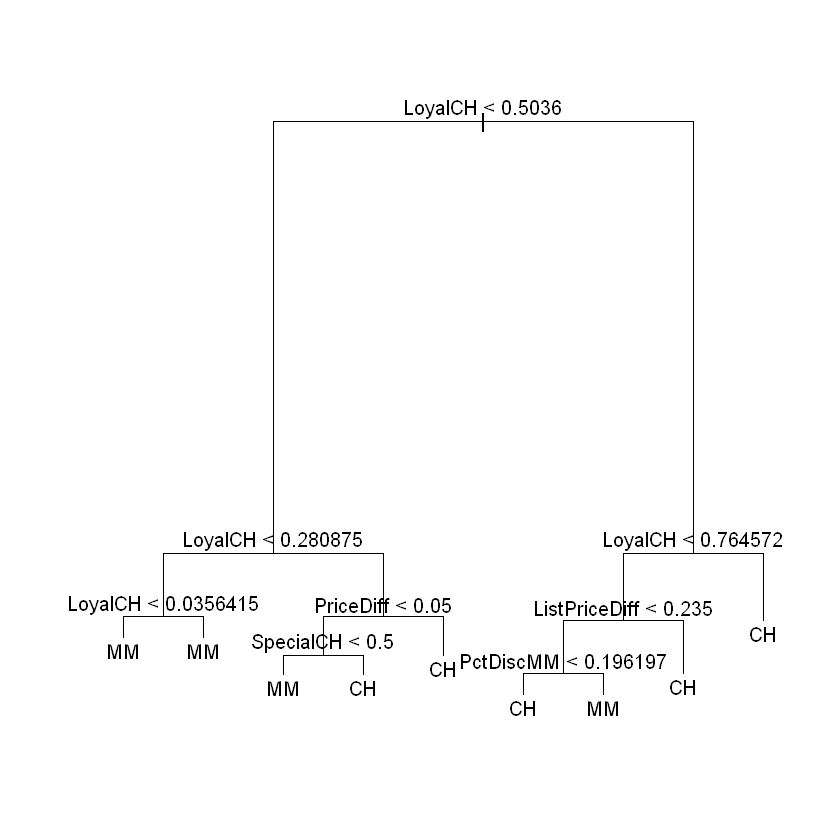

In [158]:
plot(tree.model)
text(tree.model, pretty=0)

**LoyalCH** is the most important variable of the tree

In [159]:
tree.pred = predict(tree.model, test, type = "class")

In [160]:
table(test$Purchase, tree.pred)

    tree.pred
      CH  MM
  CH 160   8
  MM  38  64

In [161]:
cv.oj = cv.tree(tree.model, FUN = prune.tree)

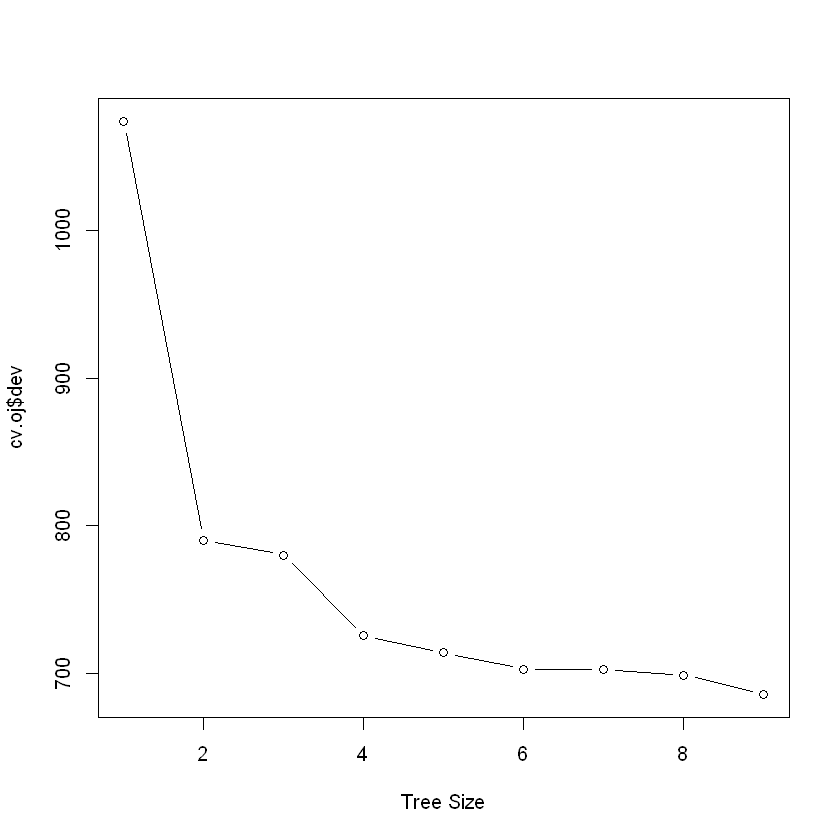

In [162]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size")

the optimal size is 9 which is already the size of the tree we have

### Exercise 10

In [202]:
rm("Hitters")

In [203]:
Hitter = Hitters[-which(is.na(Hitters$Salary)),]

In [204]:
split = 1:200
train = Hitter[split,]
test=Hitter[-split,]

In [177]:
install.packages("gbm")

Warning message:
"package 'gbm' is in use and will not be installed"


In [205]:
library(gbm)

In [206]:
lambdas = seq(0.01, 0.5, by = 0.01)
length = length(lambdas)
train.errors = rep(NA, length)
test.errors = rep(NA, length)
for (i in 1:length) {
    boost.hitters = gbm(Salary ~ .,train, distribution = "gaussian",n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, train, n.trees = 1000)
    test.pred = predict(boost.hitters, test, n.trees = 1000)
    train.errors[i] = mean((train$Salary - train.pred)^2)
    test.errors[i] = mean((test$Salary - test.pred)^2)
}

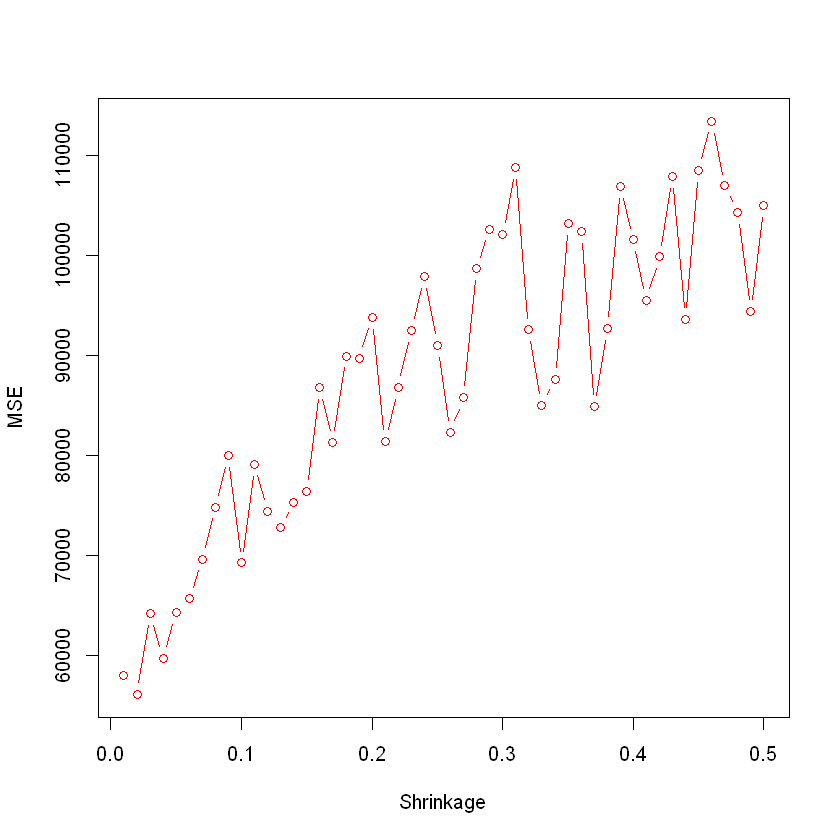

In [208]:
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "MSE",col = "red")

In [209]:
best = lambdas[which.min(test.errors)]

In [210]:
boost.best = gbm(Salary ~ .,train, distribution = "gaussian",n.trees = 1000, shrinkage = best)

,var,rel.inf
,<chr>,<dbl>
CHmRun,CHmRun,18.6053662
Walks,Walks,12.1190252
Hits,Hits,9.2135229
Years,Years,8.3937280
CAtBat,CAtBat,7.6303158
PutOuts,PutOuts,6.8287292
CRBI,CRBI,6.4529151
CRuns,CRuns,5.1229853
AtBat,AtBat,5.0166850


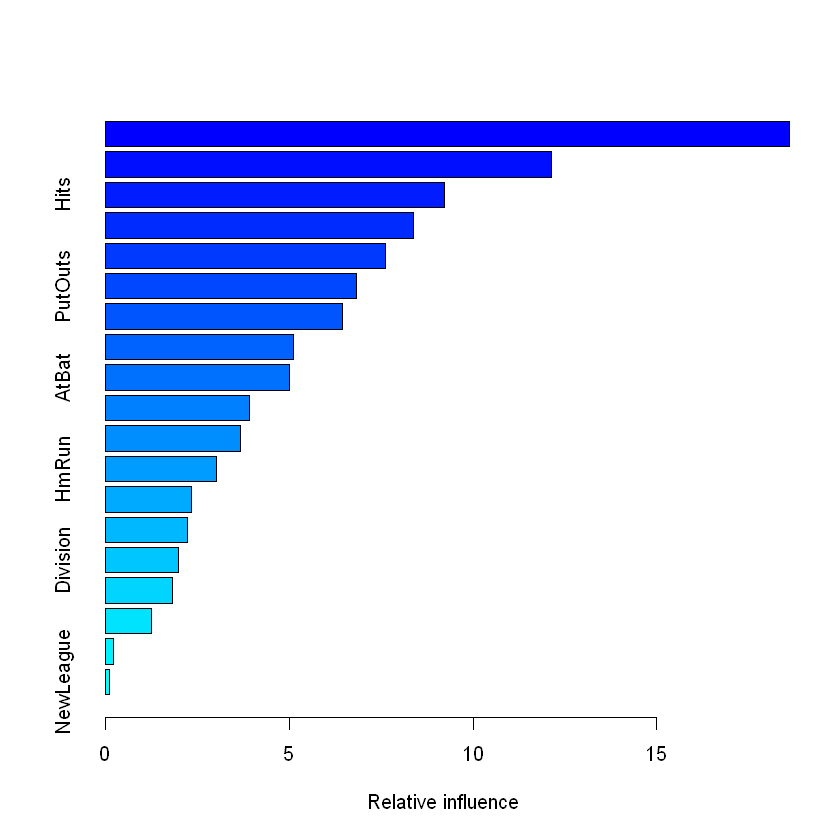

In [211]:
summary(boost.best)

**CHmRun, Walks and Hits** are three most important variables in that order.

In [217]:
bag.hitters = randomForest(Salary ~ .,train, mtry = 20, ntree = 500)
bag.pred = predict(bag.hitters, test)
mean((test$Salary - bag.pred)^2)

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"


[1] 53141.13